<h1>Eigenvalues in the complex plane</h1>
<p>
    This file provides code to visualise the eigenvalues of the linear Douglas-Rachford method as described in Section 4.1.<br />
    Especially Figure 4.1 may be reproduced using the provided code below.
</p>
<p>
    The preconditioned Douglas-Rachford iteration for $A,B,\Delta\in\mathbb R^{n\times n}$ is given as the fixed point iteration of
</p>
<p>
    $$
        \begin{split}
            H_\Delta &= J_{\Delta A}(\Delta A + J_{\Delta B} (\mathbb I - \Delta A))\\
            &= (\mathbb I + \Delta A + \Delta B + \Delta B \Delta A)^{-1}(\mathbb I + \Delta B \Delta A),
        \end{split}
    $$
</p>
<p>
    where $\mathbb I\in\mathbb R^{n\times n}$ is the identity matrix. Furthermore, assume that all requirements on $A, B$ and $\Delta$ from Lemma 4.1 are fulfilled. 
</p>
<p>
    In the following, code for three possible choices of $\Delta$ may be found:
</p>
<ol>
    <li> $\Delta = t \mathbb I$ for $t >0$.<br /><br /></li>
    <li> $\Delta = \begin{bmatrix}t \mathbb I & 0 \\ 0 & s \mathbb I\end{bmatrix}$ with $t, s >0$.<br /><br /></li>
    <li> $\Delta = \begin{bmatrix}\tilde t \mathbb I & 0 \\ 0 & \tilde s \mathbb I\end{bmatrix}$ with $\tilde t, \tilde s >0$ being the optimal choice in order to minimize $\rho(\lambda_{t,s})$.<br /></li>
</ol>
<p>
    &nbsp;
<p>
    We start with general settings and definitions for all three choices:
</p>

In [1]:
# import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, SelectionSlider
from IPython.display import display

In [2]:
# dimension of the matrices A, B and Delta.
# has to be even for 2nd choice of Delta!
# n has to be divisible by 2 (see creation of matrices)
n = 50
timesteps_t = 100
timesteps_s = 100

In [3]:
# in order to recreate the images from Figure 4.1 set the seed to 100
np.random.seed(100)

In [4]:
# store helper matrices for later

dims = (int(n/2), int(n/2))

I = np.identity(n)
I_half = np.identity(int(n/2))
zero = np.zeros(dims)

# create random matrices A and B, such that have the shape as A and B in (33).

# creation of A
A_1_generator = np.random.uniform(-10.0, 10.0, (n, int(n/2)))
A_1 = A_1_generator.T @ A_1_generator

A_2_generator = np.random.uniform(-10.0, 10.0, dims)
A_2_inv = A_2_generator.T @ A_2_generator

A = np.block([[A_1, zero],
              [zero, A_2_inv]])

# creation of B
K = np.random.uniform(-10.0, 10.0, dims)
B = np.block([[zero, K.transpose()],
              [(-1)*K, zero]])


In [5]:
# preparations to plot a circle in the complex plane
# (i.e. the circle described in Lemma 4.1 in which all eigenvalues lie)

theta = np.linspace(0, 2*np.pi, 100)

circle_x = 0.5 * np.cos(theta) + 0.5 
circle_y = 0.5 * np.sin(theta)

<hr />
<h3>
    1. $\Delta = t\mathbb I$:
</h3>
<p>
    We start precomputing eigenvalues for different values of $t>0$ first:
</p>

In [6]:
# precompute eigenvalues first. Plot them in the next input field

# plot eigenvalues for t in this range
t_range = np.logspace(-4, 1, timesteps_t)

# store eigenvalues for later plotting
eigenvalues_t = []

# compute spectral radius on the fly. Always smaller or equal to 1 according to Lemma 4.1
smallest_spec_radius_t = 1.0

for t_index, t in enumerate(t_range):
    
    # compute H_Delta for each t and its eigenvalues
    H_Delta = np.linalg.solve(I + t * A + t * B + t**2 * B @ A, I + t**2 * B @ A)
    
    eigvals = np.linalg.eigvals(H_Delta)
    eigenvalues_t.append(eigvals)
    
    # check if spectral radius for this t is better than for previous t
    spec_radius = abs(max(eigvals, key=abs))
    
    if spec_radius < smallest_spec_radius_t:
        smallest_spec_radius_t = spec_radius
        

<p>
    Now the eigenvalues can be drawn in the complex plane.
</p>

In [7]:
# start to define styles for recurring use 
def get_styled_figure(eigval_string):
    
    # higher resolution and get basic figure
    plt.rcParams['figure.dpi'] = 100
    figure, ax = plt.subplots()
    
    # limits and ticks
    plt.xlim([0.0, 1.25])
    plt.ylim([-0.55, 0.55])

    plt.xticks([1.0])
    plt.yticks([-0.5, 0.0, 0.5])

    # aspect and labels
    ax.set_aspect(1)
    ax.set_xlabel(f"Re({eigval_string})", loc='right', labelpad=-5.0)
    ax.set_ylabel(f"Im({eigval_string})", loc='top', rotation=0, labelpad=-25.0)

    # hide frame around plot
    ax.spines['top'].set_color('none')
    ax.spines['bottom'].set_position('zero')
    ax.spines['left'].set_position('zero')
    ax.spines['right'].set_color('none')

    # arrowheads
    ax.plot(1, 0, ">k", transform=ax.get_yaxis_transform(), clip_on=False)
    ax.plot(0, 1, "^k", transform=ax.get_xaxis_transform(), clip_on=False)

    # plot circle from Lemma 4.1
    ax.plot(circle_x, circle_y, color="black", lw=0.5)
    
    return figure, ax

In [8]:
# first visualization: interactive tool (does not work without connecting notebook to a kernel)

figure_ti, ax_ti = get_styled_figure('$\lambda_t$')

# plot dots into figure.
# only move them around later on in each update step and don't replot them
dots = ax_ti.scatter(eigenvalues_t[0].real,
                     eigenvalues_t[0].imag,
                     color='red',
                     s=8,
                     zorder=10
                )
plt.close()

# update eigenvalues in plot depending on value for t
def plot_eigenvalues_t(t_index):

    dots.set_offsets([[z.real, z.imag] for z in eigenvalues_t[t_index]])
    display(figure_ti)

# interacive slider in notebook
slider = SelectionSlider(
    options = [("{:.5f}".format(t), t_index) for t_index, t in enumerate(t_range)],
    description='$t$:'
)

# display slider and call plot eigenvalues_t whenever it has been moved
display(interact(plot_eigenvalues_t, t_index=slider))

interactive(children=(SelectionSlider(description='$t$:', options=(('0.00010', 0), ('0.00011', 1), ('0.00013',…

<function __main__.plot_eigenvalues_t(t_index)>

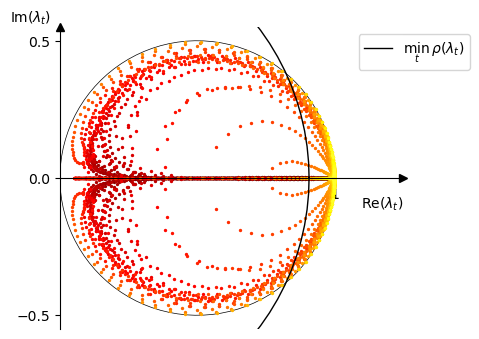

In [9]:
# second visualization: plot with eigevalues for all timesteps
_, ax_t = get_styled_figure('$\lambda_t$')

# heat coloring, start with colormap-value 0.0 and increase it after each timestep
color = 0.0
cmap = plt.cm.get_cmap('hot')

# plot eigenvalues for each timestep
for t_index in range(timesteps_t):
    
    ax_t.scatter(eigenvalues_t[t_index].real,
                   eigenvalues_t[t_index].imag,
                   color=cmap(color),
                   s=2,
                   zorder=2
    )
    color += 0.8 * 1/timesteps_t

# plot a circle which indicates the smallest spectral radius
spec_circle_x = smallest_spec_radius_t * np.cos(theta)
spec_circle_y = smallest_spec_radius_t * np.sin(theta)
ax_t.plot(spec_circle_x,
            spec_circle_y,
            color="black",
            lw=1,
            zorder=3,
            label=r"$\min_t\,\rho(\lambda_t)$"
)

ax_t.legend(bbox_to_anchor=(0.85, 1))

# show plot and eventually store it for usage out of notebook
# plt.savefig("eigenvalues_varying_t.png", dpi=300, bbox_inches='tight')
plt.show()

<hr />
<h3>
    2. $\Delta = \begin{bmatrix}t \mathbb I & 0 \\ 0 & s \mathbb I\end{bmatrix}$:
</h3>
<p>
    We start precomputing eigenvalues for different values of $t>0$ and $s>0$ first:
</p>

In [10]:
# precompute eigenvalues first. Plot them in the next input field

# plot eigenvalues for s in this range, use range for t from before
s_range = np.logspace(-4, 1, timesteps_s)

# store eigenvalues. This time we get eigenvalues for each possible pair (t,s)
eigenvalues_ts = []

# find smallest spectral radius if both t and s vary
smallest_spec_radius_ts = 1.0
t_index_best, s_index_best = 0,0

for t_index, t in enumerate(t_range):
    
    eigenvalues_ts.append([])
    
    for s_index, s in enumerate(s_range):
        
        # compute H_Delta for each t,s combination and its eigenvalues
        Delta = np.block([[t * I_half, zero],
                          [zero, s * I_half]])
        
        H_Delta = np.linalg.solve(I + Delta @ A + Delta @ B + Delta @ B @ Delta @ A, I + Delta @ B @ Delta @ A)
    
        eigvals = np.linalg.eigvals(H_Delta)
        eigenvalues_ts[t_index].append(eigvals)
        
        # check if spectral radius for this t,s combination is better than before
        spec_radius = abs(max(eigvals, key=abs))
        
        if spec_radius < smallest_spec_radius_ts:
            smallest_spec_radius_ts = spec_radius
            
            t_index_best, s_index_best = t_index, s_index
        

<p>
    Now the eigenvalues can be drawn in the complex plane:
</p>

In [11]:
# first visualization: interactive tool (does not work without connecting notebook to a kernel)
figure_tsi, ax_tsi = get_styled_figure('$\lambda_{t,s}$')

# plot dots into figure.
# only move them around later on in each update step and don't replot them
dots = plt.scatter(eigenvalues_ts[0][0].real,
                   eigenvalues_ts[0][0].imag,
                   color='red',
                   s=8,
                   zorder=10
                )
plt.close()

# update eigenvalues in plot depending on value for t and s
def plot_eigenvalues(t_index, s_index):

    dots.set_offsets([[z.real, z.imag] for z in eigenvalues_ts[t_index][s_index]])
    display(figure_tsi)

# interacive s-slider in notebook
t_slider = SelectionSlider(
    options = [("{:.5f}".format(t), t_index) for t_index, t in enumerate(t_range)],
    description='$t$:'
)

# interacive t-slider in notebook
s_slider = SelectionSlider(
    options = [("{:.5f}".format(s), s_index) for s_index, s in enumerate(s_range)],
    description ='$s$:'
)

# display slider and call plot eigenvalues_ts whenever it has been moved
display(interact(plot_eigenvalues, t_index = t_slider, s_index = s_slider))

interactive(children=(SelectionSlider(description='$t$:', options=(('0.00010', 0), ('0.00011', 1), ('0.00013',…

<function __main__.plot_eigenvalues(t_index, s_index)>

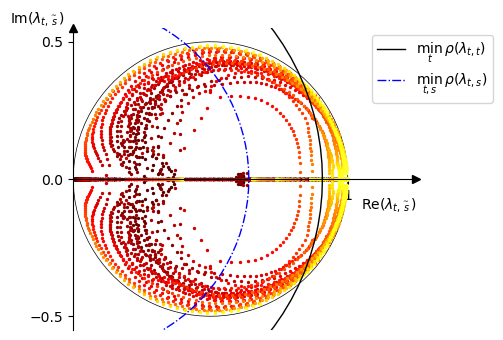

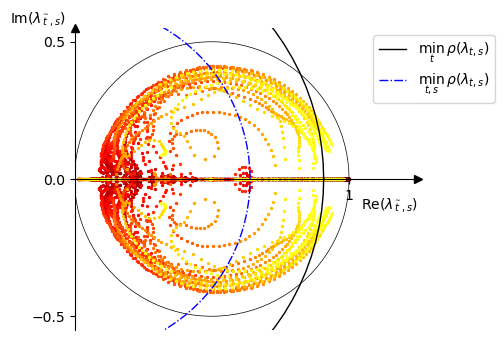

In [12]:
# second visualization: two plots with eigevalues for all timesteps with fixed t / s

### first plot ###

# make a single plot with eigevalues for all timesteps
_, ax_s_fixed = get_styled_figure('$\lambda_{t,\overset{\sim}{s}}$')

# reset color variable, heatmap is defined from plot before
color = 0.0

# plot eigenvalues for each timestep t, s fixed
for t_index in range(timesteps_t):
    
    ax_s_fixed.scatter(eigenvalues_ts[t_index][s_index_best].real,
                   eigenvalues_ts[t_index][s_index_best].imag,
                   color=cmap(color),
                   s=2,
                   zorder=2
    )
    color += 0.8 * 1/timesteps_t

# plot both the circle for min only-t spectral radius and min ts-spectral radius
spec_st_circle_x = smallest_spec_radius_ts * np.cos(theta)
spec_st_circle_y = smallest_spec_radius_ts * np.sin(theta)

ax_s_fixed.plot(spec_circle_x,
            spec_circle_y,
            color="black",
            lw=1,
            zorder=3,
            label=r"$\min_t\,\rho(\lambda_{t,t})$"
)
ax_s_fixed.plot(spec_st_circle_x,
            spec_st_circle_y,
            color="blue",
            lw=1,
            zorder=3,
            linestyle="-.",
            label=r"$\min_{t,s}\,\rho(\lambda_{t,s})$"
)

ax_s_fixed.legend(bbox_to_anchor=(0.85, 1))
 
# show plot and eventually store it for usage out of notebook
# plt.savefig("eigenvalues_varying_t_fixed_s.png", dpi=300, bbox_inches='tight')
plt.show()

### Second plot ###

# make a single plot with eigevalues for all timesteps
_, ax_t_fixed = get_styled_figure('$\lambda_{\overset{\sim}{t},s}$')

# reset color variable, heatmap is defined from plot before
color = 0.0

# plot eigenvalues for each timestep s, t fixed
for s_index in range(timesteps_s):
    
    ax_t_fixed.scatter(eigenvalues_ts[t_index_best][s_index].real,
                   eigenvalues_ts[t_index_best][s_index].imag,
                   color=cmap(color),
                   s=2,
                   zorder=2
    )
    color += 0.8 * 1/timesteps_s

# plot both circles as before
ax_t_fixed.plot(spec_circle_x,
            spec_circle_y,
            color="black",
            lw=1,
            zorder=3,
            label=r"$\min_t\,\rho(\lambda_{t,s})$"
)
ax_t_fixed.plot(spec_st_circle_x,
            spec_st_circle_y,
            color="blue",
            lw=1,
            zorder=3,
            linestyle="-.",
            label=r"$\min_{t,s}\,\rho(\lambda_{t,s})$"
)

ax_t_fixed.legend(bbox_to_anchor=(0.85, 1))

# show plot and eventually store it for usage out of notebook
# plt.savefig("eigenvalues_varying_s_fixed_t.png", dpi=300, bbox_inches='tight')
plt.show()

<hr />
<h3>
    3. $\Delta = \begin{bmatrix}\tilde t \mathbb I & 0 \\ 0 & \tilde s \mathbb I\end{bmatrix}$:
</h3>
<p>
    In the end, we plot the eigenvalues for the optimal choice of $t$ and $s$, i.e. for $\tilde t, \tilde s$.
</p>

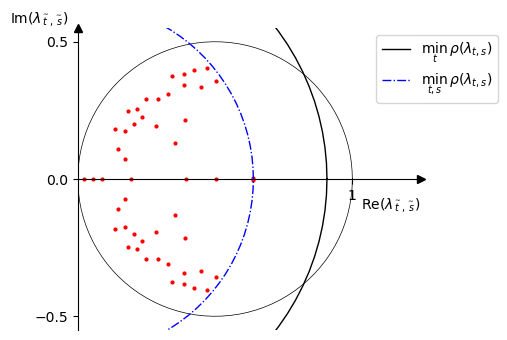

In [13]:
# last plot for both fixed t and s
_, ax_all_fixed = get_styled_figure('$\lambda_{\overset{\sim}{t},\overset{\sim}{s}}$')

# eigenvalues and the indices have been precomputed before
ax_all_fixed.scatter(eigenvalues_ts[t_index_best][s_index_best].real,
                eigenvalues_ts[t_index_best][s_index_best].imag,
                color="red",
                s=4,
                zorder=2
              )

# plot the two circles from before again
ax_all_fixed.plot(spec_circle_x,
            spec_circle_y,
            color="black",
            lw=1,
            zorder=3,
            label=r"$\min_t\,\rho(\lambda_{t,s})$"
)
ax_all_fixed.plot(spec_st_circle_x,
            spec_st_circle_y,
            color="blue",
            lw=1,
            zorder=3,
            linestyle="-.",
            label=r"$\min_{t,s}\,\rho(\lambda_{t,s})$"
)

ax_all_fixed.legend(bbox_to_anchor=(0.85, 1))

# show plot and eventually store it for usage out of notebook
# plt.savefig("eigenvalues_fixed_s_t.png", dpi=300, bbox_inches='tight') 
plt.show()